## Base de Dados - Machine Learning

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
SEED = 5
np.random.seed(SEED)

In [50]:
dados = pd.read_json('../Dados/df_para_ml.json')
dados.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,fl_servico_seguranca_online,...,fl_servico_internet_dsl,fl_servico_internet_fibra_otica,fl_sem_servico_internet,fl_contrato_anual,fl_contrato_bienal,fl_contrato_mensal,fl_pagamento_ccredito,fl_pagamento_cheque_correio,fl_pagamento_cheque_eletronico,fl_pagamento_transf_bancaria
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,0,...,0,1,0,0,0,1,0,1,0,0


### Verificar se a variável target está balanceada

In [51]:
dados.fl_inativo.value_counts()

0    5174
1    1869
Name: fl_inativo, dtype: int64

In [52]:
dados.fl_inativo.value_counts(normalize=True) * 100

0    73.463013
1    26.536987
Name: fl_inativo, dtype: float64

Temos que 73% da base está classificada como 0 (não churn) apresentando um desbalanceamento

#### Balancendo os dados

In [53]:
from imblearn.over_sampling import SMOTE

Separando X e y

In [54]:
map_sexo = {'Feminino': 0, 'Masculino': 1}
dados.sexo.replace(map_sexo, inplace=True)

In [55]:
x = dados.loc[:, 'sexo':'fl_pagamento_transf_bancaria']
y = dados.fl_inativo

In [56]:
smote = SMOTE(random_state=SEED)

[SMOTE.fit_resample](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE.fit_resample)

In [58]:
dados.shape

(7043, 29)

In [59]:
x_resample, y_resample = smote.fit_resample(x, y)

In [60]:
df_balanced = pd.merge(left=y_resample, right=x_resample, left_index=True, right_index=True)
df_balanced.head()

,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,fl_servico_seguranca_online,fl_servico_backup_online,...,fl_servico_internet_dsl,fl_servico_internet_fibra_otica,fl_sem_servico_internet,fl_contrato_anual,fl_contrato_bienal,fl_contrato_mensal,fl_pagamento_ccredito,fl_pagamento_cheque_correio,fl_pagamento_cheque_eletronico,fl_pagamento_transf_bancaria
0,0,0,0,1,1,9,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,9,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,1,0,0,0,4,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,1,1,1,1,0,13,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [61]:
df_balanced.shape

(10348, 28)

Os dados aumentaram!

In [62]:
df_balanced.fl_inativo.value_counts()

0    5174
1    5174
Name: fl_inativo, dtype: int64

In [66]:
x = df_balanced.drop(columns='fl_inativo')
y = df_balanced.fl_inativo

### Criar dois ou mais modelos de Machine Learning

#### Separado base de treino e teste

In [67]:
# Divisão para teste e treino
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

#### Modelo 1: Regressão Logística

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)

#### Modelo 2: Arvore de Decisão

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state = SEED)

#### Modelo 3: Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=SEED)

#### Modelo Extra: Classificador Dummy

In [71]:
from sklearn.dummy import DummyClassifier # Usaremos um classificador dummy

dummy = DummyClassifier(random_state=SEED, strategy='constant', constant =1) # Chutar tudo 1

### Avaliar cada modelo utilizando métricas de ML

Relembrando as métricas:
* **Acurácia/Accuracy**: avalia a proporção de acertos em relação a todas as previsões realizadas. É obtida somando a diagonal principal da matriz e dividindo pela soma de todos os valores.
* **Sensibilidade/Revocação/Recall**: avalia a proporção de verdadeiros positivos dentre todos os valores positivos reais. É obtida dividindo os verdadeiros positivos pela soma de positivos reais.
* **Precisão/Precision**: avalia a proporção de verdadeiros positivos dentre as predições dadas como positivas pelo modelo. É obtida dividindo os verdadeiros positivos pela soma das previsões positivas.
* **F1 Score**: é o equilíbrio entre a sensibilidade e a precisão, sendo a média harmônica entre as duas métricas.

Fonte: [Alura](https://cursos.alura.com.br/course/modelos-preditivos-dados-deteccao-fraude/task/106629)

In [72]:
metricas = pd.DataFrame()

In [73]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

classificadores = [lr, dt, rf, dummy]

for idx, clf in enumerate(classificadores):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metricas.loc[idx, 'classificador'] = clf.__class__.__name__
    metricas.loc[idx, 'acuracia'] = metrics.accuracy_score(y_test, y_pred)
    metricas.loc[idx, 'precisao'] = metrics.precision_score(y_test, y_pred)
    metricas.loc[idx, 'recall'] = metrics.recall_score(y_test, y_pred)
    metricas.loc[idx, 'f1'] = metrics.f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    metricas.loc[idx, 'matriz_confusao'] = ConfusionMatrixDisplay(confusion_matrix=cm)

In [74]:
metricas

,classificador,acuracia,precisao,recall,f1,matriz_confusao
0,LogisticRegression,0.839583,0.841521,0.831637,0.836550,<sklearn.metrics._plot.confusion_matrix.Confus...
1,DecisionTreeClassifier,0.802087,0.773019,0.848081,0.808813,<sklearn.metrics._plot.confusion_matrix.Confus...
2,RandomForestClassifier,0.815230,0.781140,0.869225,0.822832,<sklearn.metrics._plot.confusion_matrix.Confus...
3,DummyClassifier,0.493622,0.493622,1.000000,0.660973,<sklearn.metrics._plot.confusion_matrix.Confus...


#### Avaliando Regressão Logística

In [76]:
metricas.loc[0]

classificador                                     LogisticRegression
acuracia                                                    0.839583
precisao                                                    0.841521
recall                                                      0.831637
f1                                                           0.83655
matriz_confusao    <sklearn.metrics._plot.confusion_matrix.Confus...
Name: 0, dtype: object

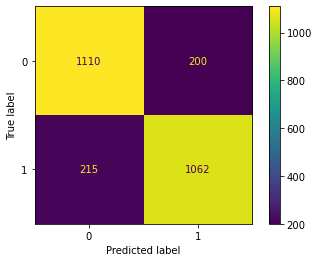

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

metricas.loc[0, 'matriz_confusao'].plot()

#### Avaliando Árvore de Decisão

In [78]:
metricas.loc[1]

classificador                                 DecisionTreeClassifier
acuracia                                                    0.802087
precisao                                                    0.773019
recall                                                      0.848081
f1                                                          0.808813
matriz_confusao    <sklearn.metrics._plot.confusion_matrix.Confus...
Name: 1, dtype: object

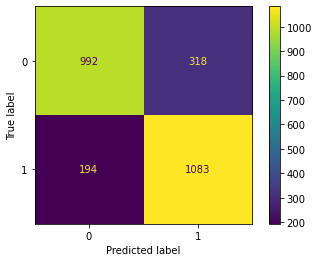

In [79]:
metricas.loc[1, 'matriz_confusao'].plot()

#### Avaliando Random Forest

In [80]:
metricas.loc[2]

classificador                                 RandomForestClassifier
acuracia                                                     0.81523
precisao                                                     0.78114
recall                                                      0.869225
f1                                                          0.822832
matriz_confusao    <sklearn.metrics._plot.confusion_matrix.Confus...
Name: 2, dtype: object

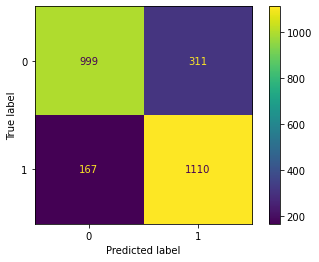

In [82]:
metricas.loc[2, 'matriz_confusao'].plot()

#### Avaliando Dummy

In [83]:
metricas.loc[3]

classificador                                        DummyClassifier
acuracia                                                    0.493622
precisao                                                    0.493622
recall                                                           1.0
f1                                                          0.660973
matriz_confusao    <sklearn.metrics._plot.confusion_matrix.Confus...
Name: 3, dtype: object

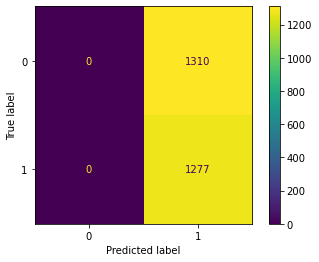

In [84]:
metricas.loc[3, 'matriz_confusao'].plot()

#### Conclusão sobre os modelos

In [85]:
metricas

,classificador,acuracia,precisao,recall,f1,matriz_confusao
0,LogisticRegression,0.839583,0.841521,0.831637,0.836550,<sklearn.metrics._plot.confusion_matrix.Confus...
1,DecisionTreeClassifier,0.802087,0.773019,0.848081,0.808813,<sklearn.metrics._plot.confusion_matrix.Confus...
2,RandomForestClassifier,0.815230,0.781140,0.869225,0.822832,<sklearn.metrics._plot.confusion_matrix.Confus...
3,DummyClassifier,0.493622,0.493622,1.000000,0.660973,<sklearn.metrics._plot.confusion_matrix.Confus...


Em ambos os modelos, temos métricas que precisam ser melhoradas. Com atenção aos valores Falso Negativo ([1, 0] na matriz confusão) pois este é a classificação de, no nosso caso, Churn para um cliente não Churn.

Vamos melhorar as métricas, com atenção especial à recall

### Escolher o melhor modelo

Irei utilizar o `RandomForestClassifier` devido aos melhores resultados em relação ao recall

#### Hiperparâmetros que podem ser melhorados

Conforme a documentação do modelo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), eu defini estes parâmetros para melhoria:
* **n_estimators**: Número de estimadores (árvores)
* **criterion**: Algoritmo utilizado na mensuração das árvores
* **max_depth**: Profundidade dos nós (com muito cuidado para evitar o overfit)
* **max_features**: Número de atributos considerado na mensuração de pesos dos nós
* **bootstrap**: Flag para utilização do conjunto completo na definição das árvores

In [100]:
n_estimators = np.arange(100, 200, step=20)
criterion = ["gini", "entropy", "log_loss"]
max_depth = list(np.arange(2, 10, step=1))
max_features = ["sqrt", "log2", None]
bootstrap = [True, False]

## Adicionado depois
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]

In [101]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "bootstrap": bootstrap,
    "min_samples_leaf": min_samples_leaf,
    "min_samples_split": min_samples_split
}

In [102]:
from sklearn.model_selection import RandomizedSearchCV

rf_boost = RandomForestClassifier(random_state=SEED)

In [103]:
random_cv = RandomizedSearchCV(
    rf_boost, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [104]:
rcv = random_cv.fit(x_train, y_train)

In [105]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.215895,0.005813,0.021800,0.002398,100,8,2,sqrt,2,log_loss,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.866821,0.872209,0.842956,0.860662,0.012712,5
1,0.570284,0.007795,0.049370,0.002416,180,6,2,log2,6,entropy,True,"{'n_estimators': 180, 'min_samples_split': 6, ...",0.878368,0.876059,0.883757,0.879394,0.003226,3
2,0.684094,0.011911,0.055626,0.001997,180,8,4,log2,8,log_loss,True,"{'n_estimators': 180, 'min_samples_split': 8, ...",0.876828,0.876059,0.889145,0.880677,0.005996,2
3,0.615447,0.030673,0.023702,0.001192,120,4,4,None,2,log_loss,True,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.942263,0.936105,0.946882,0.941750,0.004415,1
4,0.219966,0.002207,0.023025,0.000064,120,4,2,log2,2,log_loss,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.856043,0.851424,0.879138,0.862202,0.012123,4


In [106]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 2,
 'criterion': 'log_loss',
 'bootstrap': True}

In [107]:
metricas

,classificador,acuracia,precisao,recall,f1,matriz_confusao
0,LogisticRegression,0.839583,0.841521,0.831637,0.836550,<sklearn.metrics._plot.confusion_matrix.Confus...
1,DecisionTreeClassifier,0.802087,0.773019,0.848081,0.808813,<sklearn.metrics._plot.confusion_matrix.Confus...
2,RandomForestClassifier,0.815230,0.781140,0.869225,0.822832,<sklearn.metrics._plot.confusion_matrix.Confus...
3,DummyClassifier,0.493622,0.493622,1.000000,0.660973,<sklearn.metrics._plot.confusion_matrix.Confus...
4,RandomForestClassifierBoost,0.750290,0.679567,0.935004,0.787080,<sklearn.metrics._plot.confusion_matrix.Confus...


In [108]:
rf_cv = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

rf_cv.fit(x_train, y_train)
y_pred = rf_cv.predict(x_test)
metricas.loc[idx + 1, 'classificador'] = 'RandomForestClassifierBoost'
metricas.loc[idx + 1, 'acuracia'] = metrics.accuracy_score(y_test, y_pred)
metricas.loc[idx + 1, 'precisao'] = metrics.precision_score(y_test, y_pred)
metricas.loc[idx + 1, 'recall'] = metrics.recall_score(y_test, y_pred)
metricas.loc[idx + 1, 'f1'] = metrics.f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
metricas.loc[idx + 1, 'matriz_confusao'] = ConfusionMatrixDisplay(confusion_matrix=cm)

In [109]:
metricas

,classificador,acuracia,precisao,recall,f1,matriz_confusao
0,LogisticRegression,0.839583,0.841521,0.831637,0.836550,<sklearn.metrics._plot.confusion_matrix.Confus...
1,DecisionTreeClassifier,0.802087,0.773019,0.848081,0.808813,<sklearn.metrics._plot.confusion_matrix.Confus...
2,RandomForestClassifier,0.815230,0.781140,0.869225,0.822832,<sklearn.metrics._plot.confusion_matrix.Confus...
3,DummyClassifier,0.493622,0.493622,1.000000,0.660973,<sklearn.metrics._plot.confusion_matrix.Confus...
4,RandomForestClassifierBoost,0.750290,0.679567,0.935004,0.787080,<sklearn.metrics._plot.confusion_matrix.Confus...


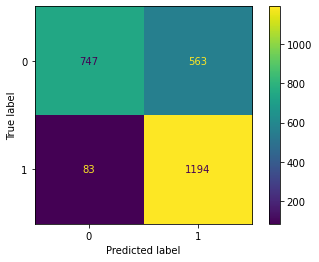

In [110]:
metricas.loc[4, 'matriz_confusao'].plot()